In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [3]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [11]:
# Initialising the ANN
classifier = Sequential()

# Input layer and first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=14))

# Second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compile the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7391 - loss: 0.5958 - val_accuracy: 0.7800 - val_loss: 0.5150
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7905 - loss: 0.5151 - val_accuracy: 0.7955 - val_loss: 0.4913
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8040 - loss: 0.4769 - val_accuracy: 0.7982 - val_loss: 0.4773
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7988 - loss: 0.4764 - val_accuracy: 0.7970 - val_loss: 0.4669
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8050 - loss: 0.4592 - val_accuracy: 0.7986 - val_loss: 0.4584
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8063 - loss: 0.4458 - val_accuracy: 0.8012 - val_loss: 0.4520
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8036 - loss: 0.4429 - val_accuracy: 0.8016 - val_loss: 0.4464
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8057 - loss: 0.4420 - val_accu

In [12]:
print(model_history.history.keys())


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


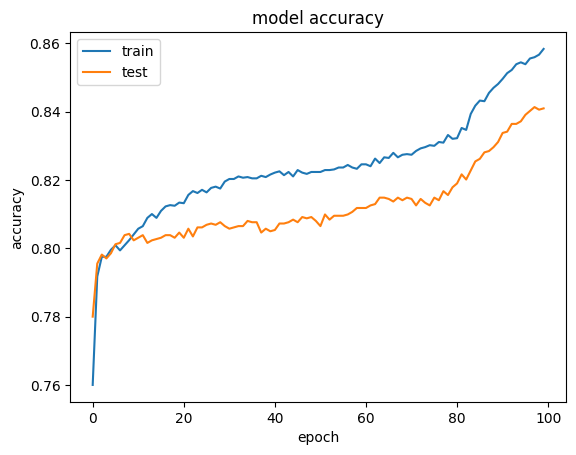

In [15]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

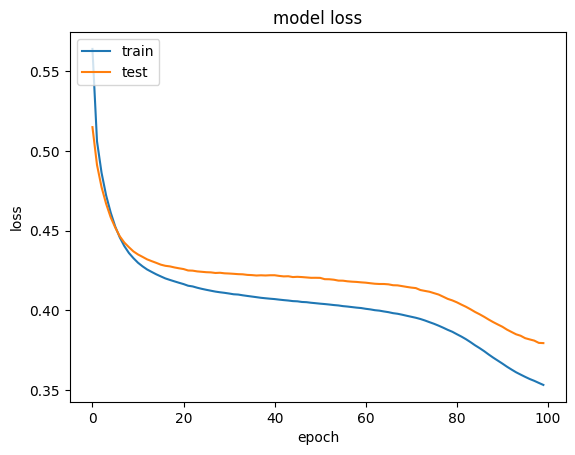

In [16]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1490,  105],
       [ 191,  214]], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.852